# Generating Uniform Random Numbers

> **Q**: *How to generate pure random string?*<br>
**A**: *Put a fresh student in front of vi editor and ask him[/her] to quit.*<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-- Emiliano Lourbet (@taitooz)


To perform computer-based simulation we need to be able to generate random numbers. Generating random numbers following a uniform distribution are the easiest to generate and are what comes out of the standard programming language "give me a random number" function.  Here's a sample Python session:

In [10]:
import random
print(random.random())
print(random.random())
print(random.random())

0.29702908498627834
0.21304325562862947
0.347577144700581


Uniform random variables are super important because they are the basis from which we generate other random variables, such as binomial, normal, exponential etc.

## Discussion

We could generate real random numbers by accessing, for example, noise on the ethernet network device but that noise might not be uniformly distributed. We typically generate pseudorandom numbers that aren't really random but look like they are. From Ross' *Simulation* book,  we see a very easy recursive mechanism (recurrence relation) that generates values in $[0,1)$ using the [modulo](https://en.wikipedia.org/wiki/Modulo_operation) (remainder) operation:

$x_{i+1} = a x_i$ modulo $m$

That is recursive (or iterative and not *closed form*) because $x_i$ is a function of a prior value:

$x_1 = ax_0$ modulo $m$<br>
$x_2 = ax_1$ modulo $m$<br>
$x_3 = ax_2$ modulo $m$<br>
$x_4 = ax_3$ modulo $m$<br>
$...$

Ross indicates that the $x_i$ values are in [0,m-1] but setting any $x_i=0$ renders all subsequent $x_i=0$, so we should avoid that. Practically speaking, then, this method returns values in (0,1).

To get random numbers in [0,1) from $x_i$, we use $x_i / m$.

We must pick a value for $a$ and $m$ that make $x_i$ seem random. Ross suggests choosing a large prime number for $m$ that fits in our integer word size, e.g., $m = 2^{31} - 1$, and $a = 7^5 = 16807$.

Initially we set a value for $x_0$, called the *random seed* (it is not the first random number). Every seed leads to a different sequence of pseudorandom numbers. (In Python, you can set the seed of the standard library by using `random.seed([x])`.)


## Python implementation

Our goal is to take that simple recursive formula and use it to generate uniform random numbers. Function `runif01()` returns a new random value *for every call*. Use $m = 2^{31} - 1$, $a = 7^5 = 16807$, and an initial seed of $x_0 = 666$.

In [20]:
a = 16807
m = pow(2,31)-1
DFLT_SEED = 666
x_i = DFLT_SEED # this is our x_i that changes each runif01() call

def runif01():
    "Return a random value in U(0,1)"
    global x_i
    x_i = a * x_i % m
#    display(callsviz(varnames=['a','m','x_i']))
    return x_i / float(m)

Notice that x_i is in the global space not the runif() space.

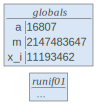

0.005212361926777457

In [18]:
from lolviz import callsviz
runif01()

Let's try it out:

In [23]:
[runif01() for i in range(4)]

[0.41140628718370864,
 0.5054686965911969,
 0.41238360824640075,
 0.9313037972577399]

### Exercise

Define a new function, `runif(a,b)` that generates a random number in [a,b) instead of [0,1). Hint: We need to scale and shift a random uniform value in [0,1). Note: *You can't use random.random() or any other built-in random number generators for this lab.*

```python
def runif(a,b):
    "Return a random value in U(a,b)"
    ...
```

In [24]:
def runif(a,b):
    "Return a random value in U(a,b)"
    if b<a: # swap
        t = a
        a = b
        b = t
        
    return runif01()*(b-a) + a

print([runif(0,10) for i in range(3)])
print([runif(5,6) for i in range(3)])

[4.229205108354429, 0.2502561128932313, 6.054489396537882]
[5.780328761218269, 5.985489795443364, 5.12699201662419]


### Exercise

Define a new function, `setseed(x)`, that updates the `seed` global variable.

```python
def setseed(s):
    "Update the seed global variable but ensure seed > 0"
    ...
```

This test sequence:

```python
setseed(501)
print runif01()
print runif01()
print runif01()
```

should generate:

```
0.00392101099897
0.900431859726
0.558266419712
```


In [29]:
def setseed(s):
    "Update the seed global variable but ensure seed > 0"
    global x_i
    if s <= 0: s = 666
    x_i = s

setseed(501)

print([runif01() for i in range(3)])
print([runif(5,6) for i in range(3)])

[0.003921010998972231, 0.9004318597262874, 0.5582664197116468]
[5.783716093648093, 5.916385943496779, 5.698552350373265]


### Random variable density function estimate

Jumping ahead a bit, we can use the histogram plotting example from [Manipulating and Visualizing Data](data.ipynb) as a crude form of density estimation to verify that the distribution of random values is approximately uniform:

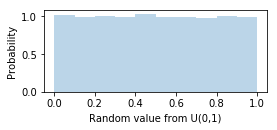

In [37]:
import matplotlib.pyplot as plt
# jupyter notebook command (ignore)
%matplotlib inline 

sample = [runif01() for i in range(50000)] # Get 5000 random variables
plt.figure(figsize=(4, 1.5))
plt.hist(sample, bins=10, density=True, alpha=0.3)
plt.xlabel('Random value from U(0,1)')
plt.ylabel('Probability')
plt.show()

In the case of generating pseudorandom numbers, we are interested in the sequence of values generated by the recurrence relation. Now we'll turn our attention to iterative methods that loop until the recurrence relation value converges.